# Insurance Claim Fraud Detection

Submitted by: Sindhu Shree N
    
Batch number: 1832

The main aim of this project is to build a predictive model to predict whether an insurance claim is fraudulent or not.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import pickle
import warnings
warnings.filterwarnings("ignore")

# Examining the data:

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [35]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [36]:
df.sample(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
755                 144   35         938634       30-08-1993           IL   
639                 290   48         824728       24-04-2013           IL   
455                 264   43         955953       18-01-2014           IL   
393                 406   58         756981       02-10-2003           OH   
108                 298   47         163161       11-11-1998           IL   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
755    100/300                500                1427.46               0   
639    250/500                500                1161.03         5000000   
455   500/1000               2000                1353.33               0   
393    250/500               2000                1117.04               0   
108   500/1000               2000                1338.50               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
755       444922  ...                       ?              87900        17580   
639       469742  ...                       ?              41520         5190   
455       447458  ...                      NO              95150        17300   
393       605121  ...                       ?              65520        10920   
108       618929  ...                       ?              70590        10860   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
755           8790         61530       Dodge        Neon      1995   
639           5190         31140      Nissan      Ultima      2014   
455          17300         60550        Ford      Escape      2007   
393           5460         49140  Volkswagen       Jetta      2009   
108          10860         48870        Saab          93      2000   

    fraud_reported _c39  
755              N  NaN  
639              N  NaN  
455              N  NaN  
393              N  NaN  
108              Y  NaN  

[5 rows x 40 columns]

We can see that the dataset consists both categorical features and the numerical features.

# Exploratory Data Analysis:

In [37]:
df.shape

(1000, 40)

So the dataset consists of 1000 rows and 39 features plus one target feature.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

So there are 2 float type, 17 integer type and 21 object type data.

In [39]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [40]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [41]:
#summary statistics
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

observations:

1.mean is greater than median in features like months_as_customer,policy_deductablem,insured_zip,capital-gains,capital-loss and injury_claim.

2.there is a large difference between 75th percentile and the maximum value in property_claim, capital-gains and policy_number.

3. The observations 1 and 2 suggests that their is a large amount of outliers are present.

In [42]:
#unique values
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

So there are two unique values in our target variable which is a binary classification.

# Data visualisation:

<AxesSubplot:xlabel='age', ylabel='count'>

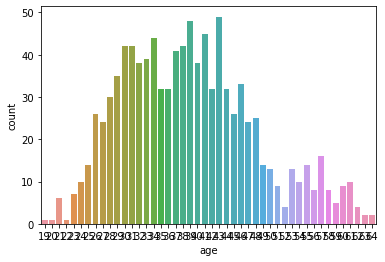

In [43]:
sns.countplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

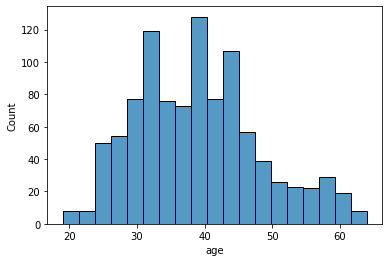

In [44]:
sns.histplot(df['age'])

So we can see that Seniorcitizens are less claimed in insurance.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

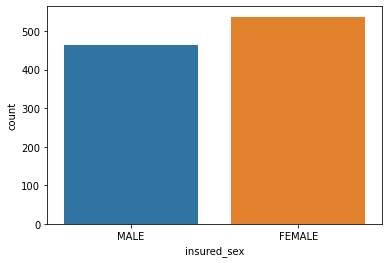

In [45]:
sns.countplot(df['insured_sex'])

Most of the females are having insurance.

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

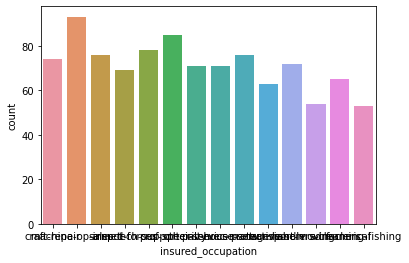

In [46]:
sns.countplot(df['insured_occupation'])

So as observed above prof-speciality occupation holders are having high insurance rate followed by craft-repair.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

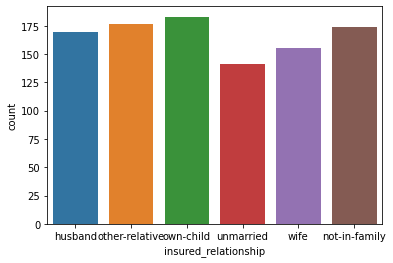

In [47]:
sns.countplot(df['insured_relationship'])

Most of the insurances are done for their respective children

<AxesSubplot:xlabel='incident_type', ylabel='count'>

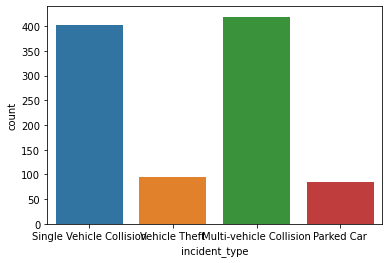

In [48]:
sns.countplot(df['incident_type'])

Most of the cases that have claimed insurance is Multi-vehicle collision followed by Single vehicle collision. But Vehicle theft and parked car has less approach to claim insurance.

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

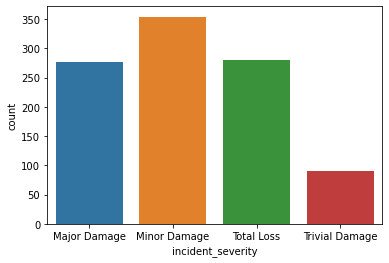

In [49]:
sns.countplot(df['incident_severity'])

Almost insurances are claimed for minor damage and major damages.

<AxesSubplot:xlabel='incident_state', ylabel='count'>

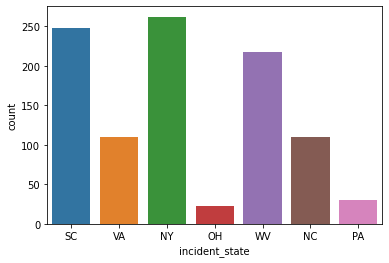

In [50]:
sns.countplot(df['incident_state'])

most incidents took place in NY

<AxesSubplot:xlabel='witnesses', ylabel='count'>

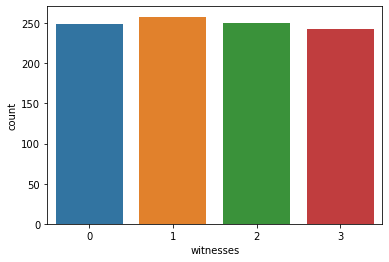

In [51]:
sns.countplot(df['witnesses'])

In [52]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

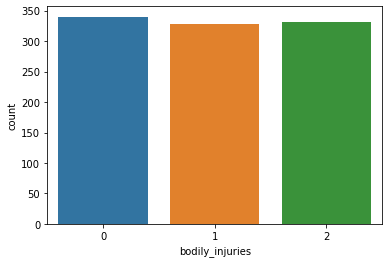

In [53]:
sns.countplot(df['bodily_injuries'])

All injuries are having same intensity.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

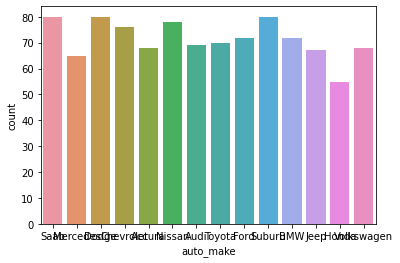

In [54]:
sns.countplot(df['auto_make'])

<AxesSubplot:xlabel='auto_model', ylabel='count'>

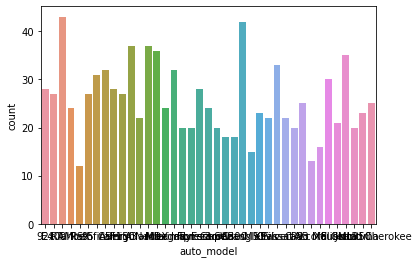

In [55]:
sns.countplot(df['auto_model'])

<AxesSubplot:xlabel='auto_year', ylabel='count'>

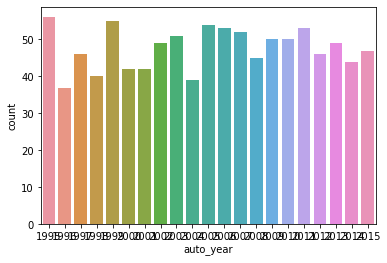

In [56]:
sns.countplot(df['auto_year'])

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

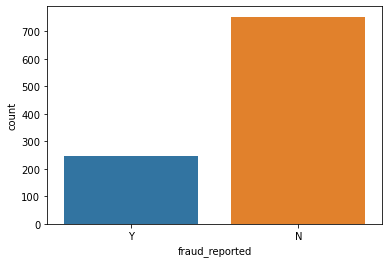

In [57]:
sns.countplot(df['fraud_reported'])

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>],
       [<AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>],
       [<AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>],
       [<AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>,
        <Axe

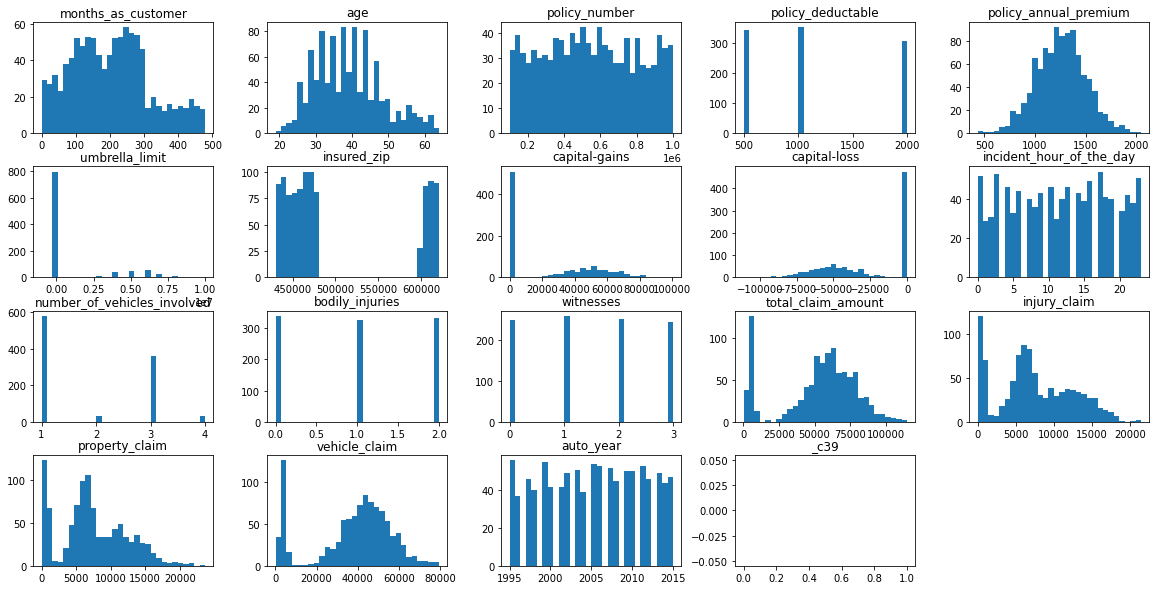

In [59]:
df.hist(figsize=(20,10),grid=False,layout=(4,5),bins=30)

# Bivariate Analysis:

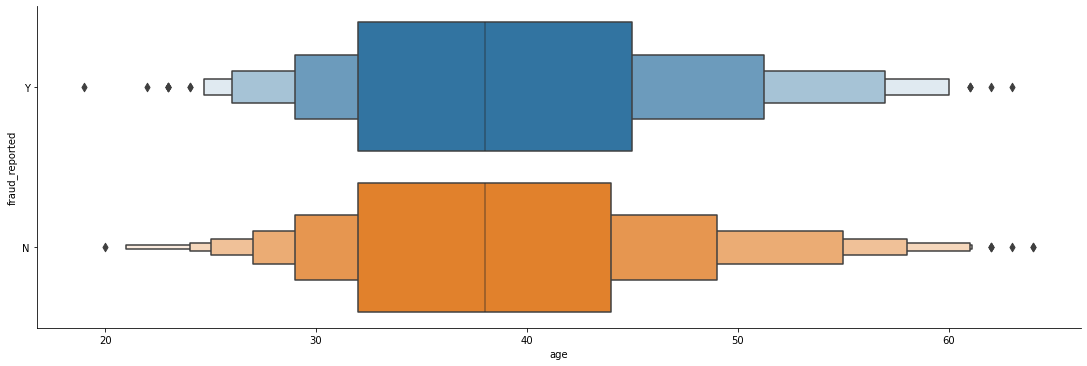

In [61]:
sns.catplot(x='age',y='fraud_reported',kind='boxen',aspect=3,data=df)

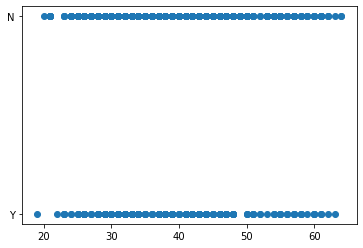

In [62]:
plt.scatter(df['age'],df['fraud_reported'])

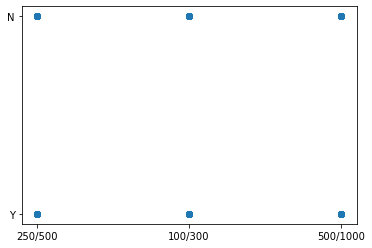

In [63]:
plt.scatter(df['policy_csl'],df['fraud_reported'])

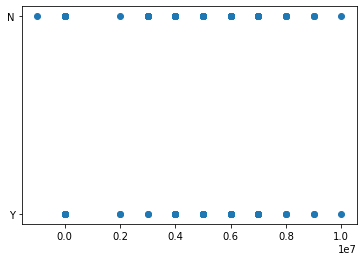

In [64]:
plt.scatter(df['umbrella_limit'],df['fraud_reported'])

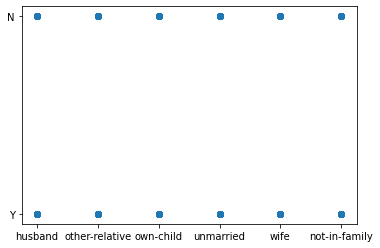

In [65]:
plt.scatter(df['insured_relationship'],df['fraud_reported'])

<AxesSubplot:xlabel='insured_sex', ylabel='age'>

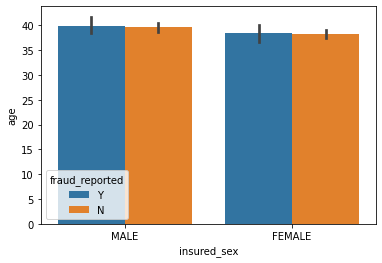

In [66]:
sns.barplot(x='insured_sex',y='age',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_occupation', ylabel='age'>

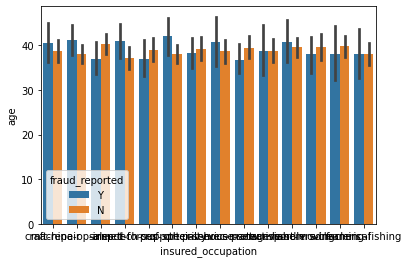

In [67]:
sns.barplot(x='insured_occupation',y='age',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='vehicle_claim', ylabel='property_claim'>

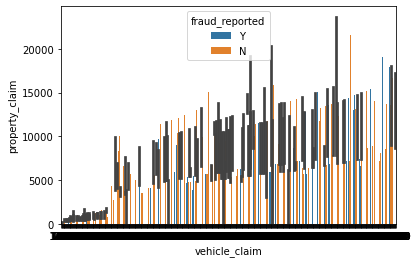

In [68]:
sns.barplot(x='vehicle_claim',y='property_claim',hue='fraud_reported',data=df)

In [69]:
#checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

So the feature _c39 consists of completely null values we will drop that feature.

In [3]:
df.drop('_c39',axis=1,inplace=True)
df.head(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   

  fraud_reported  
0              Y  
1              Y  

[2 rows x 39 columns]

<AxesSubplot:>

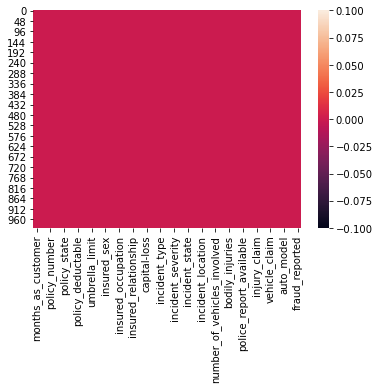

In [72]:
sns.heatmap(df.isnull())

So our dataset does not contain null values.

In [4]:
fraud_numeric={'Y':1,'N':0}
df.fraud_reported.replace(fraud_numeric,inplace=True)

In [77]:
#using cross table to know the effects of some input features on the target
df[['insured_sex','fraud_reported']].groupby(['insured_sex']).mean()

fraud_reported
insured_sex                
FEMALE             0.234637
MALE               0.261339

So frmale and male are having their unique contributions so it is important feature to build a model.

In [79]:
df[['incident_state','fraud_reported']].groupby(['incident_state']).mean()

fraud_reported
incident_state                
NC                    0.309091
NY                    0.221374
OH                    0.434783
PA                    0.266667
SC                    0.294355
VA                    0.227273
WV                    0.179724

In [80]:
df[['policy_csl','fraud_reported']].groupby(['policy_csl']).mean()

fraud_reported
policy_csl                
100/300           0.257880
250/500           0.262108
500/1000          0.216667

In [83]:
df[['insured_relationship','fraud_reported']].groupby(['insured_relationship']).mean()

fraud_reported
insured_relationship                
husband                     0.205882
not-in-family               0.258621
other-relative              0.293785
own-child                   0.213115
unmarried                   0.241135
wife                        0.270968

In [88]:
df[['policy_number','fraud_reported']].groupby(['policy_number']).mean()

fraud_reported
policy_number                
100804                      0
101421                      0
104594                      1
106186                      0
106873                      0
...                       ...
996253                      1
996850                      0
998192                      1
998865                      0
999435                      1

[1000 rows x 1 columns]

In [89]:
df[['auto_year','fraud_reported']].groupby(['auto_year']).mean()

fraud_reported
auto_year                
1995             0.232143
1996             0.378378
1997             0.260870
1998             0.175000
1999             0.181818
2000             0.261905
2001             0.214286
2002             0.204082
2003             0.176471
2004             0.410256
2005             0.222222
2006             0.264151
2007             0.346154
2008             0.222222
2009             0.220000
2010             0.140000
2011             0.320755
2012             0.195652
2013             0.306122
2014             0.272727
2015             0.234043

After analysing I decided to drop age feature since it is not much contributing to the target variable.

In [5]:
df.drop('age',axis=1,inplace=True)

# Correlation:

In [85]:
corr=df.corr()
corr

months_as_customer  policy_number  \
months_as_customer                     1.000000       0.057555   
policy_number                          0.057555       1.000000   
policy_deductable                      0.026807      -0.006738   
policy_annual_premium                  0.005018       0.022566   
umbrella_limit                         0.015498       0.008968   
insured_zip                            0.017895       0.007083   
capital-gains                          0.006399       0.009802   
capital-loss                           0.020209      -0.005669   
incident_hour_of_the_day               0.070639       0.000113   
number_of_vehicles_involved            0.014736       0.013432   
bodily_injuries                       -0.010162      -0.004558   
witnesses                              0.058383      -0.012661   
total_claim_amount                     0.062108      -0.018009   
injury_claim                           0.065329      -0.008762   
property_claim                         0.034940      -0.010678   
vehicle_claim                          0.061013      -0.020184   
auto_year                             -0.000292      -0.000183   
fraud_reported                         0.020544      -0.029443   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
fraud_reported                        0.014817              -0.014480   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651   
total_claim_amount                -0.040344    -0.033873       0.015980   
injury_claim                      -0.045412    -0.017495       0.025934   
property_claim                    -0.023790    -0.006841      -0.000779   
vehicle_claim                     -0.038584    -0.041083       0.015836   
auto_year                          0.009893    -0.032736       0.031398   
fraud_reported                     0

<AxesSubplot:>

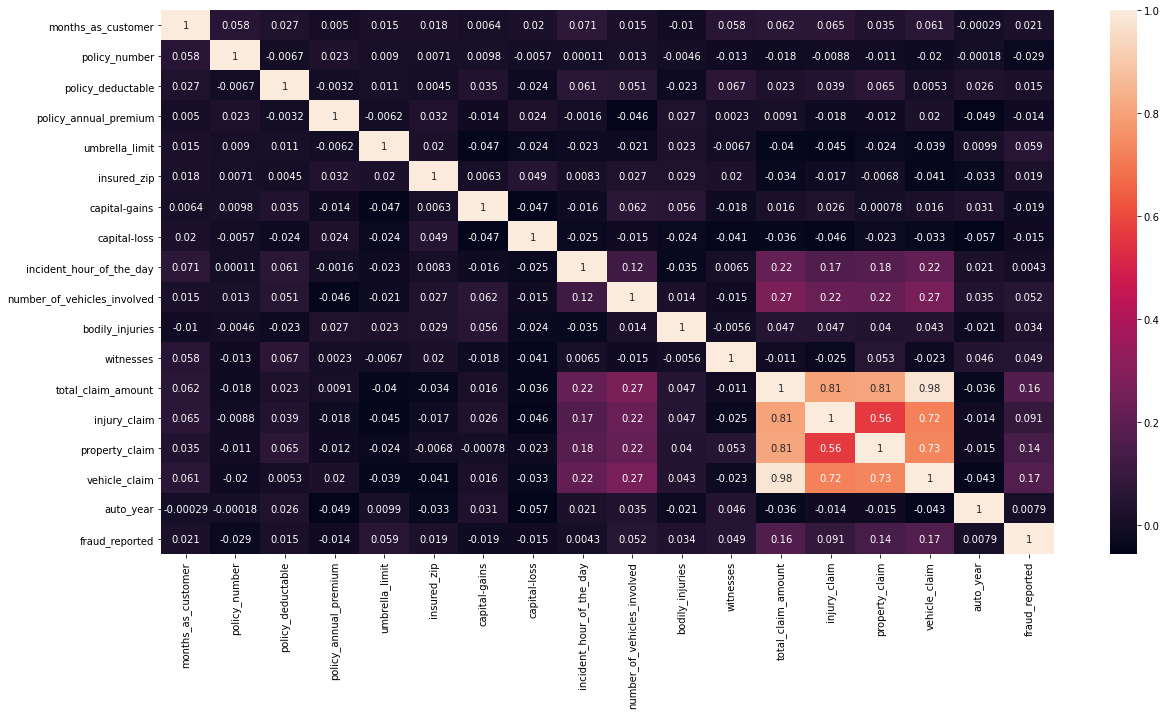

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

The dark shades represents negative relation and the lighter shades shows high positive correlation.

# Plotting Outliers:

<AxesSubplot:>

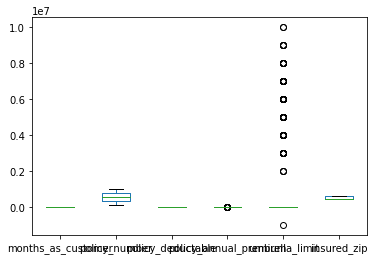

In [8]:
df[['months_as_customer','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip']].plot.box()

<AxesSubplot:>

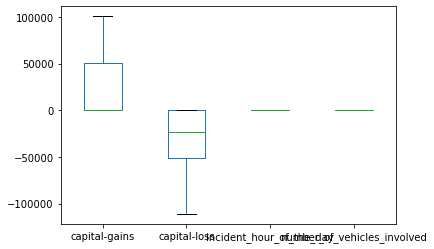

In [10]:
df[['capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved']].plot.box()

<AxesSubplot:>

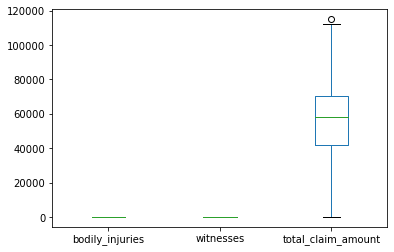

In [12]:
df[['bodily_injuries','witnesses','total_claim_amount']].plot.box()

<AxesSubplot:>

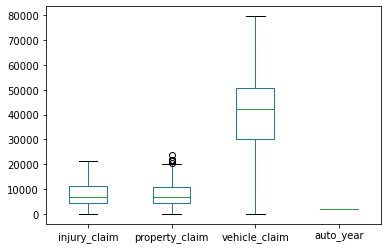

In [13]:
df[['injury_claim','property_claim','vehicle_claim','auto_year']].plot.box()

# Normal distribution curves:

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

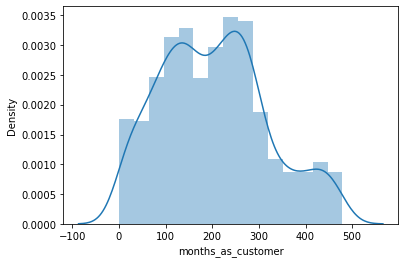

In [15]:
sns.distplot(df['months_as_customer'])

There is a large difference between the high and low rate.

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

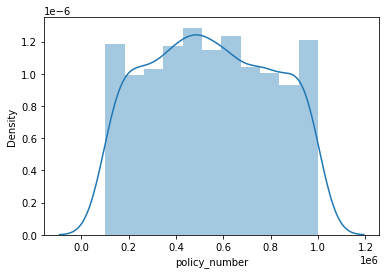

In [16]:
sns.distplot(df['policy_number'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

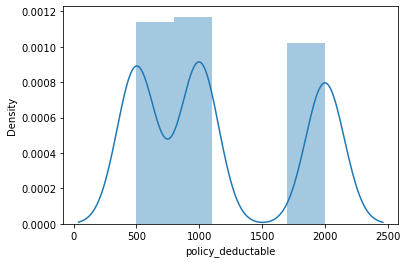

In [17]:
sns.distplot(df['policy_deductable'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

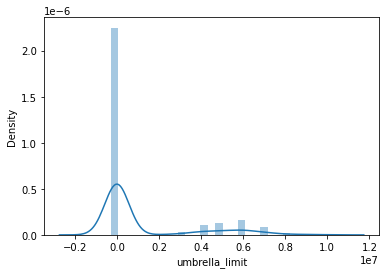

In [18]:
sns.distplot(df['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

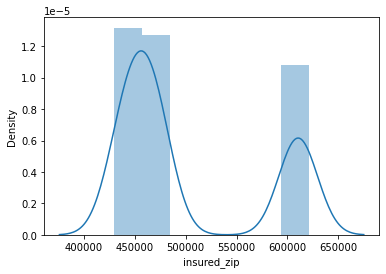

In [19]:
sns.distplot(df['insured_zip'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

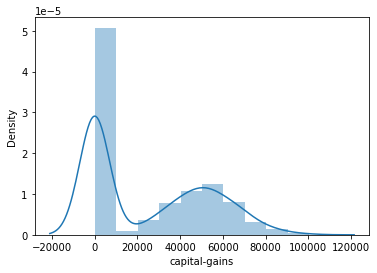

In [20]:
sns.distplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

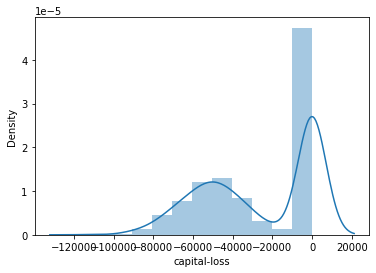

In [21]:
sns.distplot(df['capital-loss'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

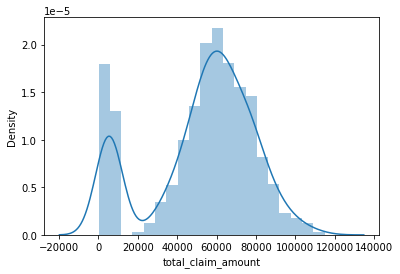

In [22]:
sns.distplot(df['total_claim_amount'])

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

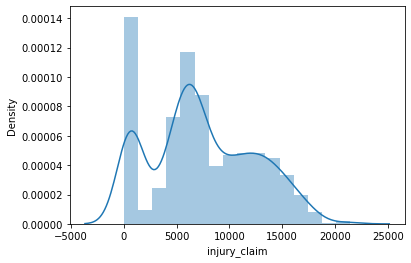

In [23]:
sns.distplot(df['injury_claim'])

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

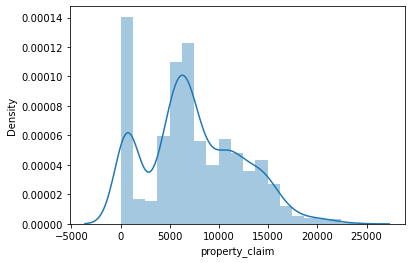

In [24]:
sns.distplot(df['property_claim'])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

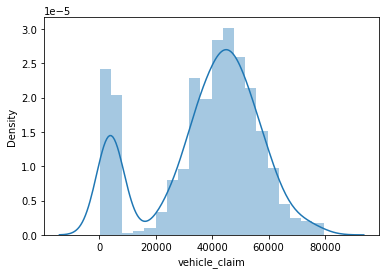

In [25]:
sns.distplot(df['vehicle_claim'])

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

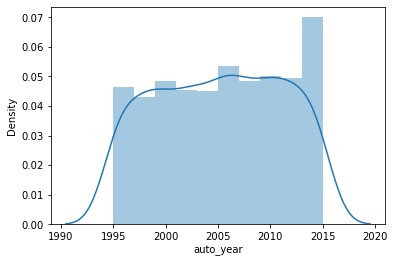

In [26]:
sns.distplot(df['auto_year'])

So we can see that all the above curves shows skewness and not normally distribution.

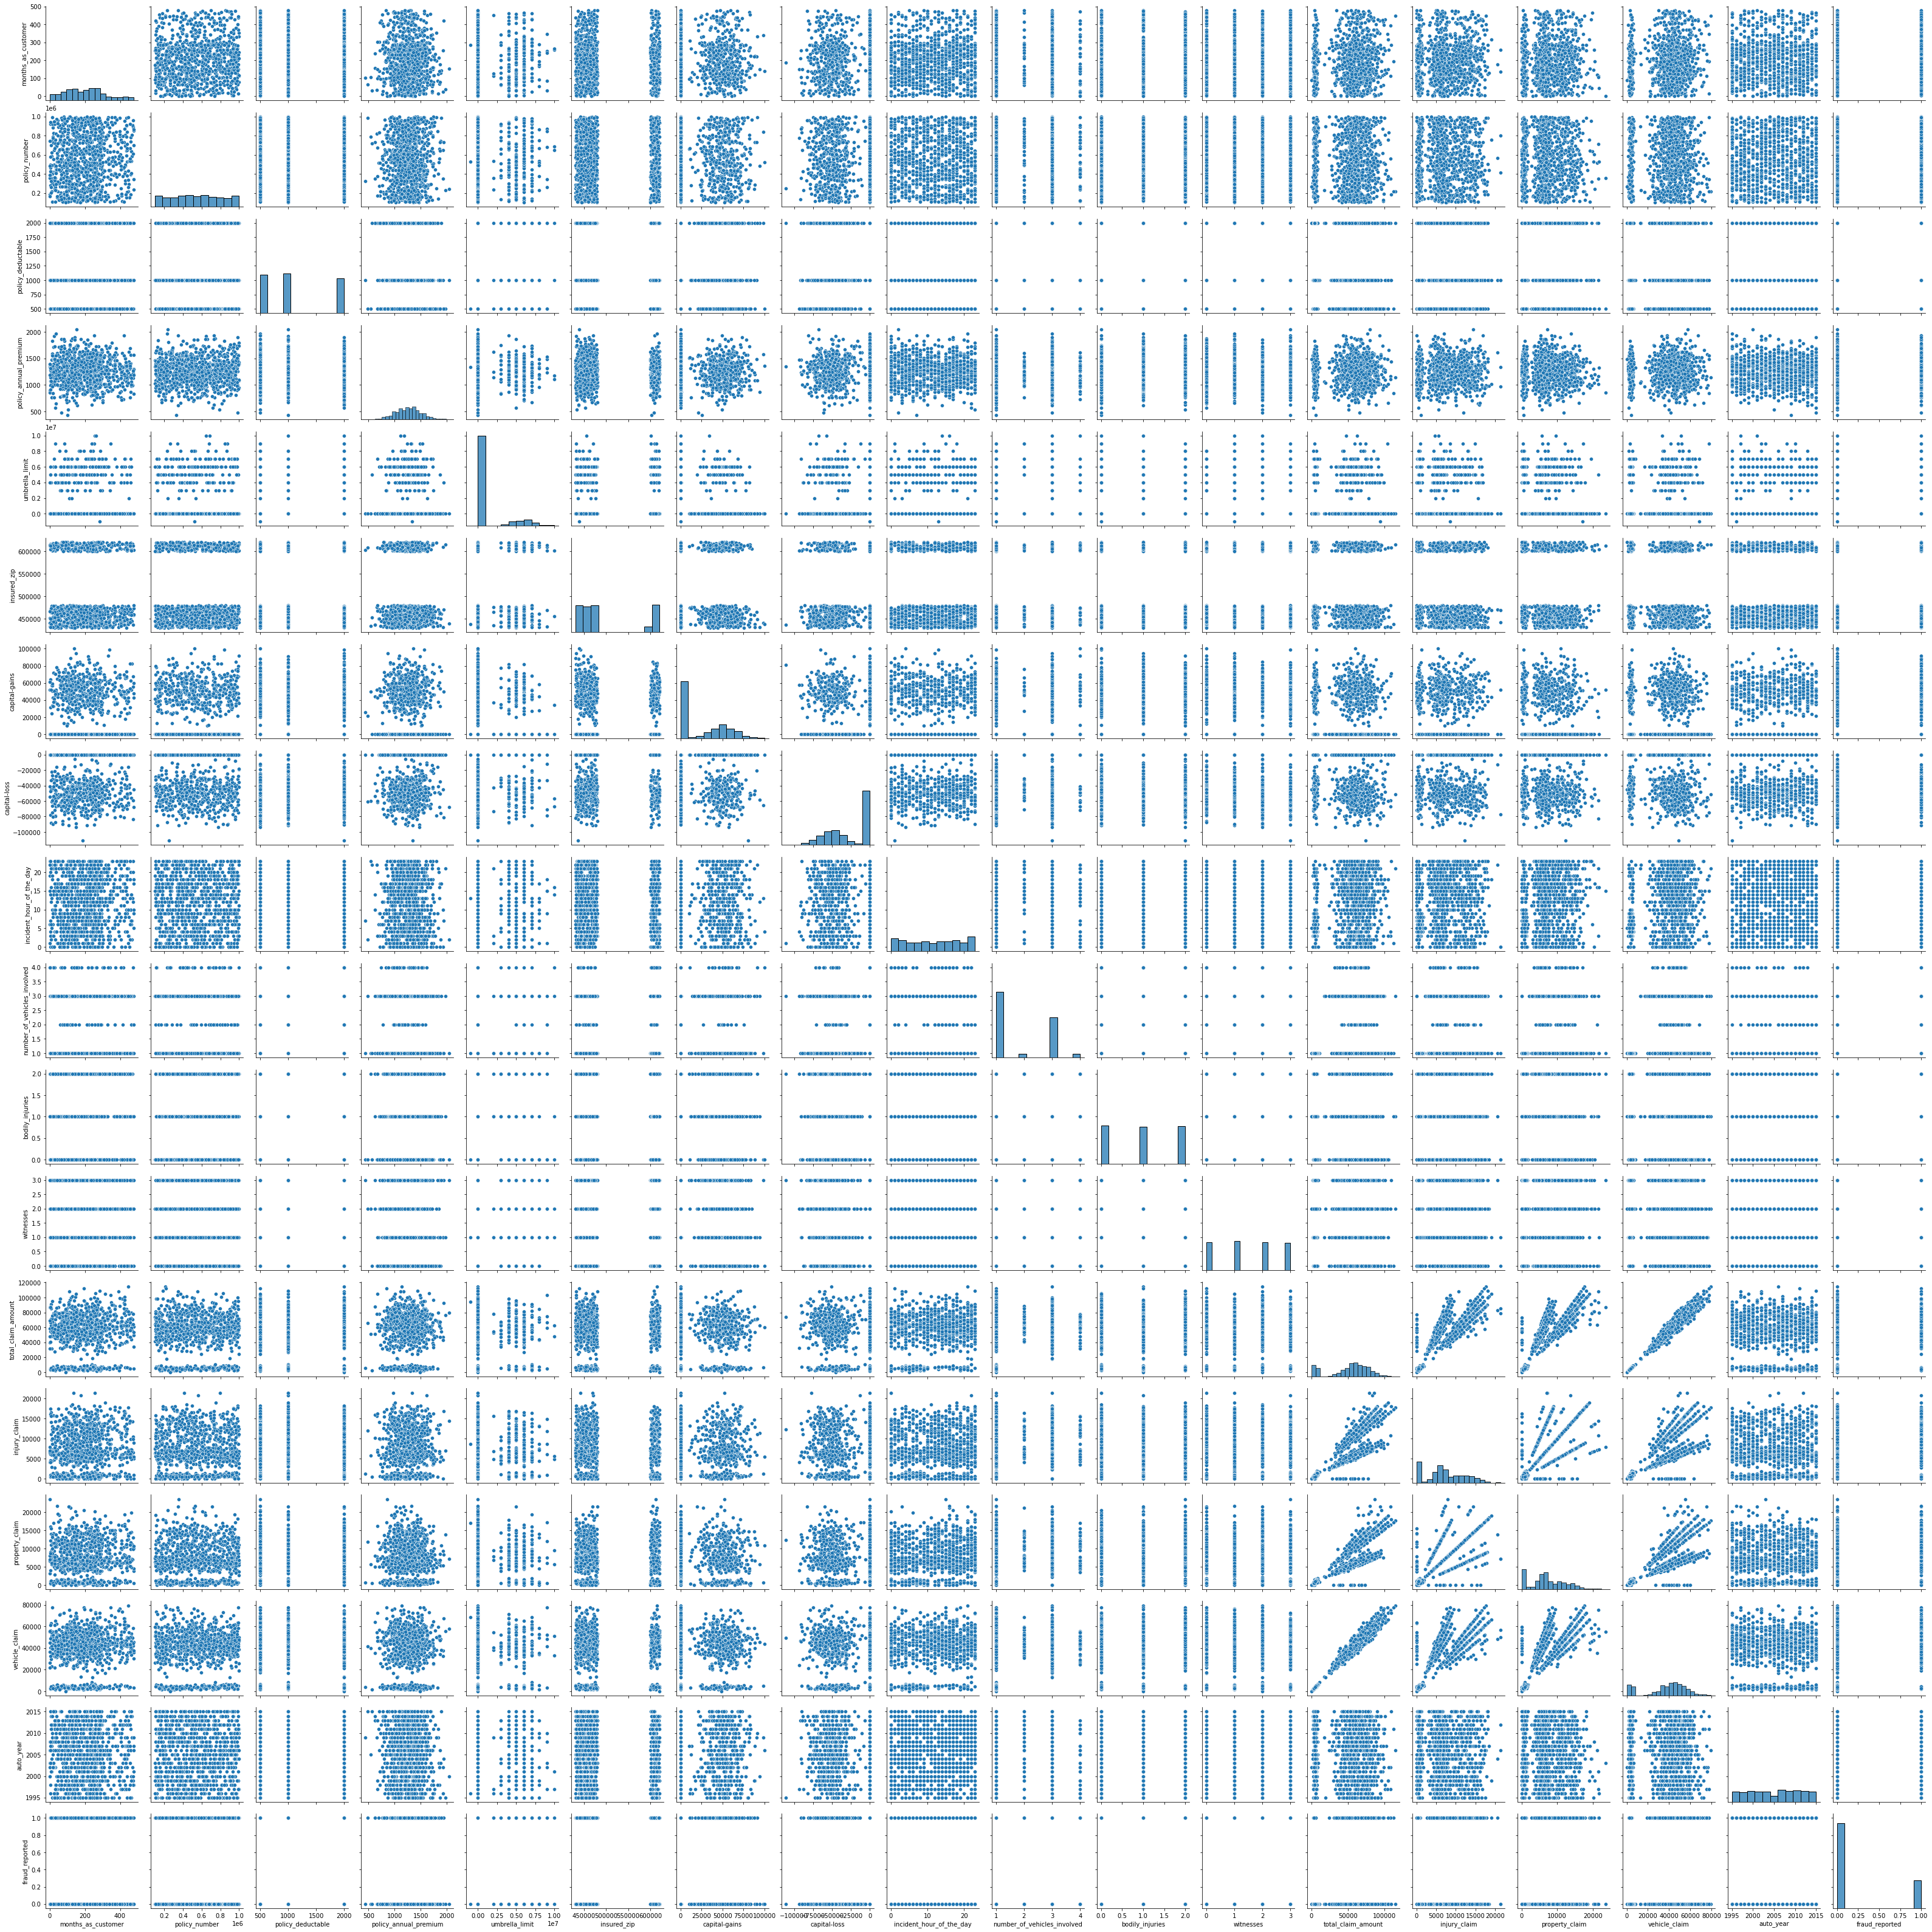

In [31]:
sns.pairplot(df)

# Removing outliers:

In [27]:
z=np.abs(zscore(df[['months_as_customer','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip',
                   'capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries',  
                    'witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']]))
z

array([[1.07813958, 0.09595307, 0.22238259, ..., 1.16550497, 0.74965272,
        0.1834404 ],
       [0.2089946 , 0.79152739, 1.41278352, ..., 1.37269599, 1.82334593,
        0.31549088],
       [0.60800168, 0.55056594, 1.41278352, ..., 0.73607206, 0.78556451,
        0.31549088],
       ...,
       [0.64276748, 1.44891961, 1.03996564, ..., 0.0208261 , 0.77190224,
        1.5139238 ],
       [2.20802805, 0.04786687, 1.41278352, ..., 0.45197603, 0.07357971,
        1.18130295],
       [2.19064515, 0.03830297, 0.22238259, ..., 1.34366428, 1.81434017,
        0.31549088]])

In [28]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 14,  4,  4,  4,  3,  7,
        4,  4,  4], dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
print(df.shape)

(980, 38)
(1000, 38)


In [30]:
loss_percent=(1000-980)/1000*100
loss_percent

2.0

Since the loss percent is just 2 we can proceed further.

# Encoding:

In [32]:
le=LabelEncoder()
df['policy_bind_date']=le.fit_transform(df['policy_bind_date'])
df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['incident_date']=le.fit_transform(df['incident_date'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['incident_location']=le.fit_transform(df['incident_location'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df.head()

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                 328         521585               532             2   
1                 228         342868               821             1   
2                 134         687698               186             2   
3                 256         227811               766             0   
4                 228         367455               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               1000                1406.91               0   
1           1               2000                1197.22         5000000   
2           0               2000                1413.14         5000000   
3           1               2000                1415.74         6000000   
4           2               1000                1583.91         6000000   

   insured_zip  insured_sex  ...  witnesses  police_report_available  \
0       466132            1  ...          2                        2   
1       468176            1  ...          0                        0   
2       430632            0  ...          3                        1   
3       608117            0  ...          2                        1   
4       610706            1  ...          1                        1   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  auto_year  fraud_reported  
0           1       2004               1  
1          12       2007               1  
2          30       2007               0  
3          34       2014               1  
4          31       2009               0  

[5 rows x 38 columns]

# Feature Engineering: 

In [33]:
#using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
scaled=Ms.fit_transform(df)
scaled

array([[0.68475992, 0.4682467 , 0.56      , ..., 0.02631579, 0.45      ,
        1.        ],
       [0.47599165, 0.26936974, 0.86421053, ..., 0.31578947, 0.6       ,
        1.        ],
       [0.27974948, 0.65309788, 0.19578947, ..., 0.78947368, 0.6       ,
        0.        ],
       ...,
       [0.27139875, 0.90995303, 0.53578947, ..., 0.5       , 0.05      ,
        0.        ],
       [0.95615866, 0.48199539, 0.60315789, ..., 0.13157895, 0.15      ,
        0.        ],
       [0.9519833 , 0.50663287, 0.37789474, ..., 0.31578947, 0.6       ,
        0.        ]])

# PCA:

In [35]:
from sklearn.decomposition import PCA
testpca=PCA()
Y=testpca.fit(scaled)

In [36]:
Y.explained_variance_ratio_

array([8.66999920e-02, 6.11699347e-02, 5.00611993e-02, 4.57079855e-02,
       4.38611485e-02, 4.25508339e-02, 4.13939989e-02, 3.92725577e-02,
       3.86294108e-02, 3.61576128e-02, 3.46926003e-02, 3.37062995e-02,
       3.18834440e-02, 3.08229179e-02, 2.81394072e-02, 2.76079140e-02,
       2.63394898e-02, 2.50008888e-02, 2.32465342e-02, 2.27490023e-02,
       2.06951709e-02, 2.06609323e-02, 2.01827847e-02, 1.90629255e-02,
       1.78587397e-02, 1.76948269e-02, 1.72628227e-02, 1.60873433e-02,
       1.54404241e-02, 1.46867688e-02, 1.30674600e-02, 1.18691414e-02,
       9.95953005e-03, 5.30204194e-03, 4.77655959e-03, 3.05222648e-03,
       2.64712967e-03, 1.70985585e-32])

In [37]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([  8.6699992 ,  14.78699267,  19.7931126 ,  24.36391115,
        28.750026  ,  33.00510939,  37.14450927,  41.07176504,
        44.93470613,  48.5504674 ,  52.01972743,  55.39035738,
        58.57870178,  61.66099357,  64.47493429,  67.23572569,
        69.86967467,  72.36976356,  74.69441697,  76.9693172 ,
        79.03883429,  81.10492752,  83.12320599,  85.02949854,
        86.81537251,  88.58485519,  90.31113746,  91.91987179,
        93.4639142 ,  94.93259108,  96.23933708,  97.42625123,
        98.42220423,  98.95240843,  99.43006438,  99.73528703,
       100.        , 100.        ])

In [38]:
k=np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 34


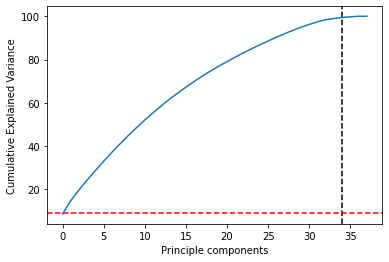

In [39]:
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Principle components")
plt.axvline(x=k,color="k",linestyle="--")
plt.axhline(y=9,color="r",linestyle="--")
plt.plot(var_cumu)
plt.show()

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

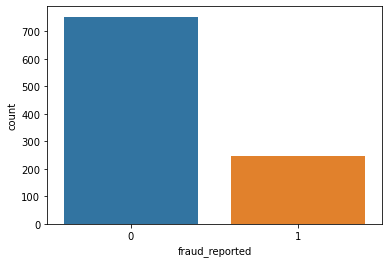

In [40]:
sns.countplot(df['fraud_reported'])

Thus our target variable is not balanced so let us use resampling technique to balance the data.

# Resampling:

Using upsampling for positive class

In [41]:
df_no=df[df.fraud_reported==0]
df_yes=df[df.fraud_reported==1]

In [42]:
#upsampling the positive class
df_yes_upsampled=df_yes.sample(n=len(df_no),replace=True,random_state=42)
print(len(df_yes_upsampled))

753


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

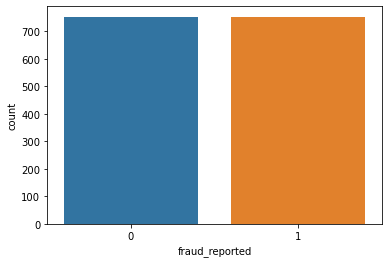

In [43]:
df_upsampled=df_no.append(df_yes_upsampled).reset_index(drop=True)
sns.countplot('fraud_reported',data=df_upsampled)

Now we can see that the target feature is balanced.

In [45]:
x=df_upsampled.drop('fraud_reported',axis=1)
y=df_upsampled['fraud_reported']

# Checking and removing skewness:

In [46]:
df_upsampled.skew()

months_as_customer             0.362177
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


In [47]:
#using power_transform to remove skewness
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[-0.54167437,  0.57899835, -1.05655336, ..., -0.53108076,
         0.94338663,  0.29843227],
       [ 0.25806843, -0.66822219, -1.07881425, ..., -1.85070126,
         1.02090082,  0.63736814],
       [-0.51358909, -0.47394044, -1.40588612, ...,  0.66366856,
         0.86526687,  1.15289145],
       ...,
       [-0.48571744,  0.67102297,  0.85952669, ..., -0.81038748,
         1.09783286, -1.65769509],
       [ 1.45295553,  1.03417218, -1.809156  , ..., -1.11323653,
         1.47447703, -1.18088634],
       [ 0.05897579, -1.65356053,  0.51150389, ...,  0.66366856,
         0.6270126 , -1.02016379]])

# Splitting the data:

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

using classification algorithms:

# 1.Ridge Classifier:

In [50]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report,confusion_matrix
ridge=RidgeClassifier()
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
print("Ridge Classifier:\n\n",classification_report(y_test,y_pred_ridge))
print("Test Accuracy of Ridge Classifier is:{}%".format(round(ridge.score(x_test,y_test)*100,2)))
print("The confusion matrix of Ridge Classifier:\n\n",confusion_matrix(y_test,y_pred_ridge))

Ridge Classifier:

               precision    recall  f1-score   support

           0       0.72      0.70      0.71       148
           1       0.72      0.74      0.73       154

    accuracy                           0.72       302
   macro avg       0.72      0.72      0.72       302
weighted avg       0.72      0.72      0.72       302

Test Accuracy of Ridge Classifier is:72.19%
The confusion matrix of Ridge Classifier:

 [[104  44]
 [ 40 114]]


# 2. Decision Tree Classifier:

In [52]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("DecisionTree Classifier:\n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy of Decision Tree Classifier is:{}%".format(round(dt.score(x_test,y_test)*100,2)))
print("\n","The confusion matrix of Decision Tree Classifier:\n\n",confusion_matrix(y_test,y_pred_dt))

DecisionTree Classifier:

               precision    recall  f1-score   support

           0       0.98      0.85      0.91       148
           1       0.87      0.99      0.93       154

    accuracy                           0.92       302
   macro avg       0.93      0.92      0.92       302
weighted avg       0.93      0.92      0.92       302

Test Accuracy of Decision Tree Classifier is:92.05%

 The confusion matrix of Decision Tree Classifier:

 [[126  22]
 [  2 152]]


# 3.AdaBoost Classifier:

In [56]:
AB=AdaBoostClassifier()
AB.fit(x_train,y_train)
y_pred_AB=knn.predict(x_test)
print("AdaBoost Classifier:\n\n",classification_report(y_test,y_pred_AB))
print("Test Accuracy of AdaBoost Classifier is:{}%".format(round(AB.score(x_test,y_test)*100,2)))
print("\n","The confusion matrix of AdaBoost Classifier:\n\n",confusion_matrix(y_test,y_pred_AB))

AdaBoost Classifier:

               precision    recall  f1-score   support

           0       0.73      0.61      0.66       148
           1       0.67      0.78      0.72       154

    accuracy                           0.70       302
   macro avg       0.70      0.69      0.69       302
weighted avg       0.70      0.70      0.69       302

Test Accuracy of AdaBoost Classifier is:83.44%

 The confusion matrix of AdaBoost Classifier:

 [[ 90  58]
 [ 34 120]]


# 4.Random Forest Classifier:

In [57]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("Random Forest Classifier:\n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy of Random Forest Classifier is:{}%".format(round(rf.score(x_test,y_test)*100,2)))
print("\n","The confusion matrix of Random Forest Classifier:\n\n",confusion_matrix(y_test,y_pred_rf))

Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.98      0.86      0.92       148
           1       0.88      0.99      0.93       154

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302

Test Accuracy of Random Forest Classifier is:92.72%

 The confusion matrix of Random Forest Classifier:

 [[128  20]
 [  2 152]]


Thus RandomForest classifier and Decision Tree classifier are giving the more accuracy compare to others, let us check the cross validation score.

# Cross Validation Score:

In [61]:
print(cross_val_score(ridge,x,y,cv=5).mean()*100)

72.90708675276672


In [62]:
print(cross_val_score(dt,x,y,cv=5).mean()*100)

90.63716969923654


In [63]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

90.4373941167411


In [64]:
print(cross_val_score(AB,x,y,cv=5).mean()*100)

84.3946227805769


So we can see that cross validation score of decision tree classifier and random forest classifier are almost same but the decision tree accuracy score is most similar to the cross validation score so we will consider Decision Tree Classifier for tuning.

# Hyper Parameter Tuning:

In [65]:
from sklearn.model_selection import GridSearchCV

In [84]:
#passing five parameters for tuning
parameters={'splitter':['best','random'],
            'max_depth':[30,35],
            'criterion':['gini','entropy'],
            'min_samples_split':[2,8],
            'min_samples_leaf':[1,5]}
            
grid=GridSearchCV(estimator=dt, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 35], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 8],
                         'splitter': ['best', 'random']})

In [85]:
best_parameters=grid.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [86]:
(grid.best_score_)*100

88.53630705394193

In [87]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=35,splitter='best',min_samples_split=2,min_samples_leaf=1)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=35)

We got a best accuracy of approximately 89%.


# AUC ROC curve:

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [91]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
y_pred_prob = dt.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1.

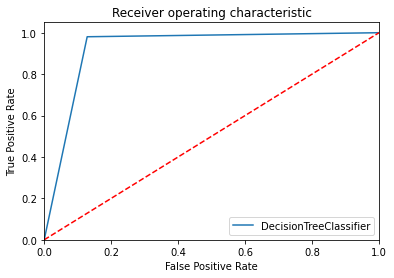

In [93]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_roc_auc = roc_auc_score(y_test, dt.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,dt.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='DecisionTreeClassifier'%dt_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Further Evaluation:

In [94]:
Final_mod=DecisionTreeClassifier()
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print(dt.score(x_test,y_test)*100)

92.71523178807946


# Saving the best model:

In [95]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [98]:
result=pd.DataFrame({})
preds=dt.predict(x_test)
result['Predicted fraud_reported']=preds
result['Actual fraud_reported']=y_test.values
result.sample(10)

Predicted fraud_reported  Actual fraud_reported
101                         1                      1
76                          0                      0
155                         1                      1
264                         0                      0
130                         1                      1
51                          0                      0
224                         1                      1
284                         1                      1
145                         0                      0
137                         1                      1

Thus the test and train data are balanced by approaching the good accuracy.